# Car Insurance Claim Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
sb.set()

In [2]:
data = pd.read_csv('train.csv')
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
data.describe(include = 'all')

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
count,58592,58592.000000,58592.000000,58592.000000,58592,58592.000000,58592.000000,58592,58592,58592,...,58592,58592,58592,58592,58592,58592,58592,58592,58592.000000,58592.000000
unique,58592,NaN,NaN,NaN,22,NaN,NaN,6,11,3,...,2,2,2,2,2,2,2,2,NaN,NaN
top,ID00001,NaN,NaN,NaN,C8,NaN,NaN,B2,M1,Petrol,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,13654,NaN,NaN,18314,14948,20532,...,32177,42435,42435,57383,34291,36309,42435,58229,NaN,NaN
mean,NaN,0.611246,0.069424,0.469420,NaN,18826.858667,1.763722,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759950,0.063968
std,NaN,0.414156,0.056721,0.122886,NaN,17660.174792,1.136988,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.389576,0.244698
min,NaN,0.002735,0.000000,0.288462,NaN,290.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.210250,0.020000,0.365385,NaN,6112.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,0.573792,0.060000,0.451923,NaN,8794.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
75%,NaN,1.039104,0.110000,0.548077,NaN,27003.000000,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000


In [4]:
print("Data Dims: ", data.shape)

Data Dims:  (58592, 44)


In [5]:
print(data.dtypes)

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [6]:
#Check for presence of null values in the dataset
print("Number of null values in each column: ")
print(data.isnull().sum())

Number of null values in each column: 
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_rad

Since there are no null values within the dataset, there are no columns that need to be removed due to invalid data.

In [7]:
#Check for duplicate rows 
print("Number of rows that are duplicates: ")
print(data.duplicated().sum())

Number of rows that are duplicates: 
0


Since the number of duplicates = 0, we can conclude that each set of data within the dataset is unique.

In [8]:
#Finding the ratio of claims vs no claims
class_freq = data['is_claim'].value_counts()
print(class_freq)

is_claim
0    54844
1     3748
Name: count, dtype: int64


In [9]:
class_ratio = class_freq[0]/class_freq[1]
print("Ratio of Class 0 to Class 1: {:.2f}".format(class_ratio))

Ratio of Class 0 to Class 1: 14.63


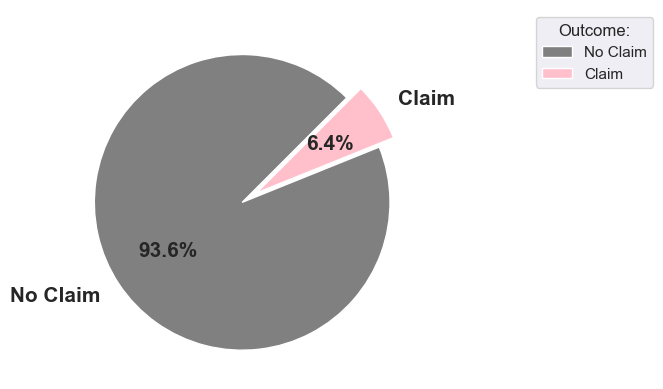

In [10]:
fig = plt.figure(facecolor ='white')
ax = fig.add_subplot(1,1,1, facecolor = 'white')
plt.pie((class_freq), labels=['No Claim', 'Claim'], radius = 1, colors = ['gray', 'pink'], autopct = '%1.1f%%', explode = [0.1, 0.015], labeldistance = 1.15, startangle = 45, textprops={'fontsize':15, 'fontweight': 'bold'})
plt.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6,1))
fig.patch.set_facecolor('white')
plt.show()

<Axes: >

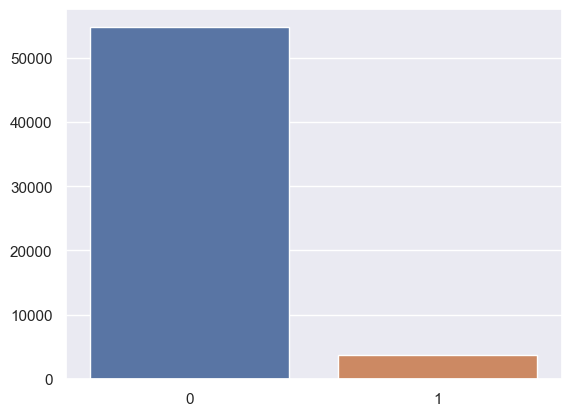

In [11]:
sns.barplot(x=[0,1], y=[54844, 3784])

Due to the large class imbalance in the response variable 'is_claim', we need to fix this to prevent further problems for classification models. 

# Analysis of Numeric Variables

In this segment, we will be investigating whether there are any relationships between the numeric variables and "is_claim".

In [12]:
numeric_data = data.select_dtypes(include = ['number'])

In [13]:
numeric_data.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,0
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0


In [14]:
numeric_data = numeric_data.drop(['ncap_rating','make', 'gear_box'], axis =1)
numeric_data.describe().round(2)

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,turning_radius,length,width,height,gross_weight,is_claim
count,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00,58592.00
mean,0.61,0.07,0.47,18826.86,3.14,1162.36,3.63,4.85,3850.48,1672.23,1553.34,1385.28,0.06
std,0.41,0.06,0.12,17660.17,1.83,266.30,0.48,0.23,311.46,112.09,79.62,212.42,0.24
min,0.00,0.00,0.29,290.00,1.00,796.00,3.00,4.50,3445.00,1475.00,1475.00,1051.00,0.00
25%,0.21,0.02,0.37,6112.00,2.00,796.00,3.00,4.60,3445.00,1515.00,1475.00,1185.00,0.00
50%,0.57,0.06,0.45,8794.00,2.00,1197.00,4.00,4.80,3845.00,1735.00,1530.00,1335.00,0.00
75%,1.04,0.11,0.55,27003.00,6.00,1493.00,4.00,5.00,3995.00,1755.00,1635.00,1510.00,0.00
max,1.40,1.00,1.00,73430.00,6.00,1498.00,4.00,5.20,4300.00,1811.00,1825.00,1720.00,1.00


<Axes: xlabel='age_of_car'>

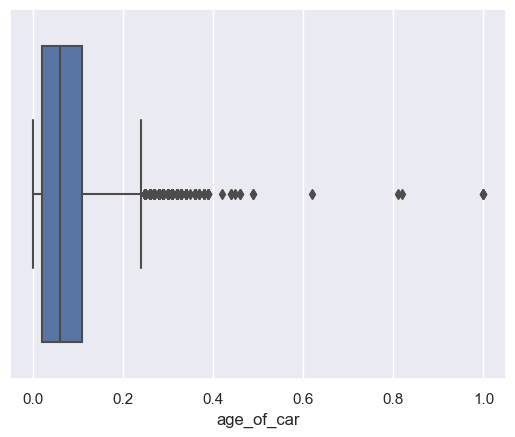

In [15]:
sns.boxplot(x='age_of_car', data = numeric_data)

In [16]:
from collections import Counter

Number of extreme values to be removed:  269
Number of negative examples removed:  260
Number of positive examples removed:  9


<Axes: xlabel='age_of_car'>

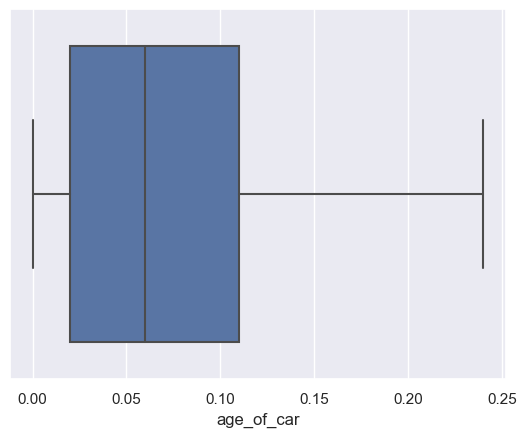

In [17]:
extreme_indices = numeric_data.age_of_car > numeric_data.age_of_car.quantile(0.995)
num_extreme_is_claim = Counter(numeric_data.loc[extreme_indices].is_claim)
print("Number of extreme values to be removed: ", sum(extreme_indices))
print("Number of negative examples removed: ", num_extreme_is_claim.get(0))
print("Number of positive examples removed: ", num_extreme_is_claim.get(1))
sns.boxplot(x='age_of_car', data=numeric_data.loc[~extreme_indices])

In [18]:
numeric_data = numeric_data.loc[~extreme_indices]

<Axes: xlabel='age_of_car', ylabel='Density'>

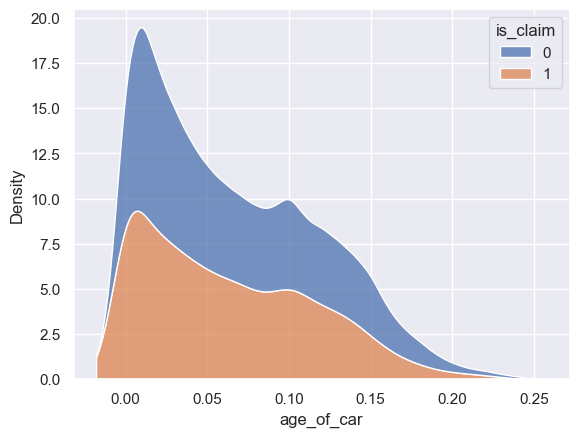

In [19]:
sns.kdeplot(data = numeric_data, x = 'age_of_car', hue = 'is_claim', 
           multiple = 'stack', common_norm = False)

<Axes: xlabel='age_of_car', ylabel='Probability'>

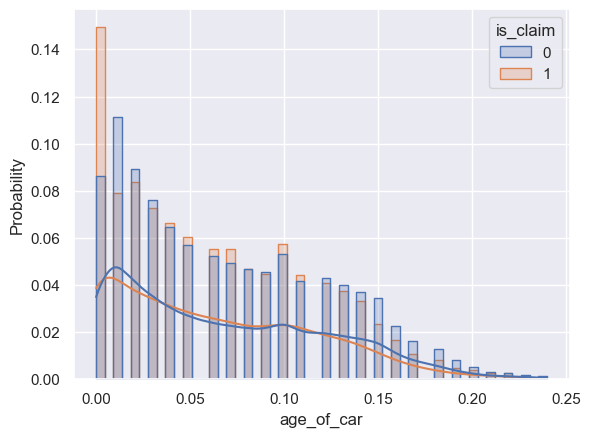

In [20]:
sns.histplot(numeric_data, x='age_of_car', hue = 'is_claim', element='step',stat='probability', common_norm = False, kde = True)

The ages of car have the same distribution between people who have claimed and people who have not claimed insurance within 6 months

<Axes: xlabel='policy_tenure', ylabel='Density'>

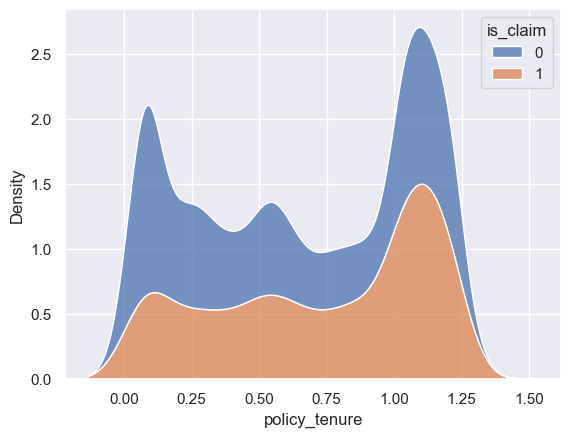

In [21]:
sns.kdeplot(data = numeric_data, x ='policy_tenure', hue = 'is_claim', multiple = 'stack', common_norm = False)

<Axes: xlabel='policy_tenure', ylabel='Probability'>

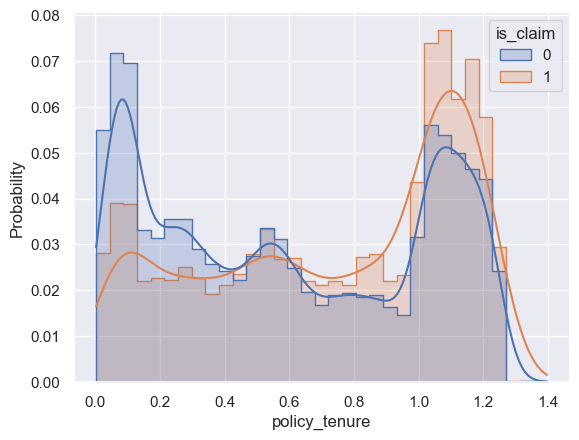

In [22]:
sns.histplot(numeric_data, x = 'policy_tenure', hue='is_claim', element = 'step',stat='probability',common_norm = False, kde=True)

The left and right sides of the graph seem to differ in behavior based on the claim. We might want to explore if there is a relationship between policy tenure and the likelihood of a car claim. 

<Axes: xlabel='area_cluster,population_density'>

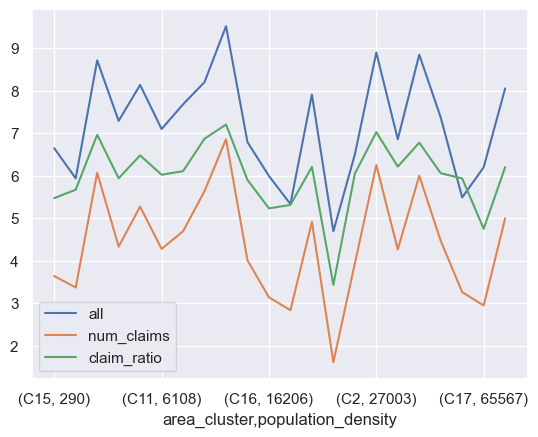

In [23]:
#Take log values so that values of population density are somewhat in the same range for easy pattern analysis 
data.groupby(by=['area_cluster','population_density'])['is_claim'].agg(
    all=lambda x:np.log(len(x)),
    num_claims = lambda x: np.log(sum(x)),
    claim_ratio = lambda x: np.log(sum(x))*10/np.log(len(x))
).sort_values(by='population_density').plot()

<Axes: xlabel='population_density', ylabel='Density'>

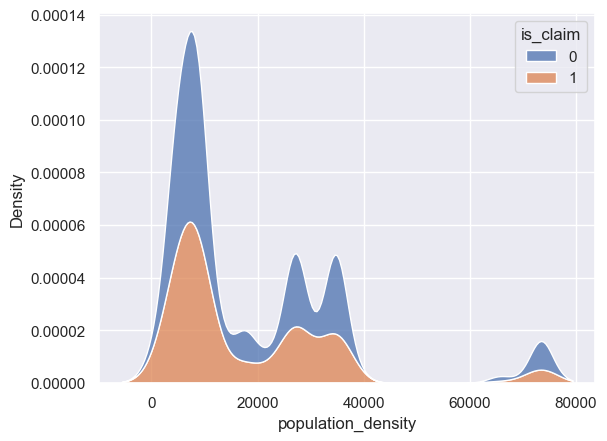

In [24]:
sns.kdeplot(data = numeric_data, x='population_density', hue='is_claim', multiple = 'stack', common_norm= False)

In [25]:
numerical = data.select_dtypes(include = [np.float64, np.int64])

/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/393352917.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/393352917.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/393352917.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/393352917.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/393352917.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/393352917.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/393352917.p

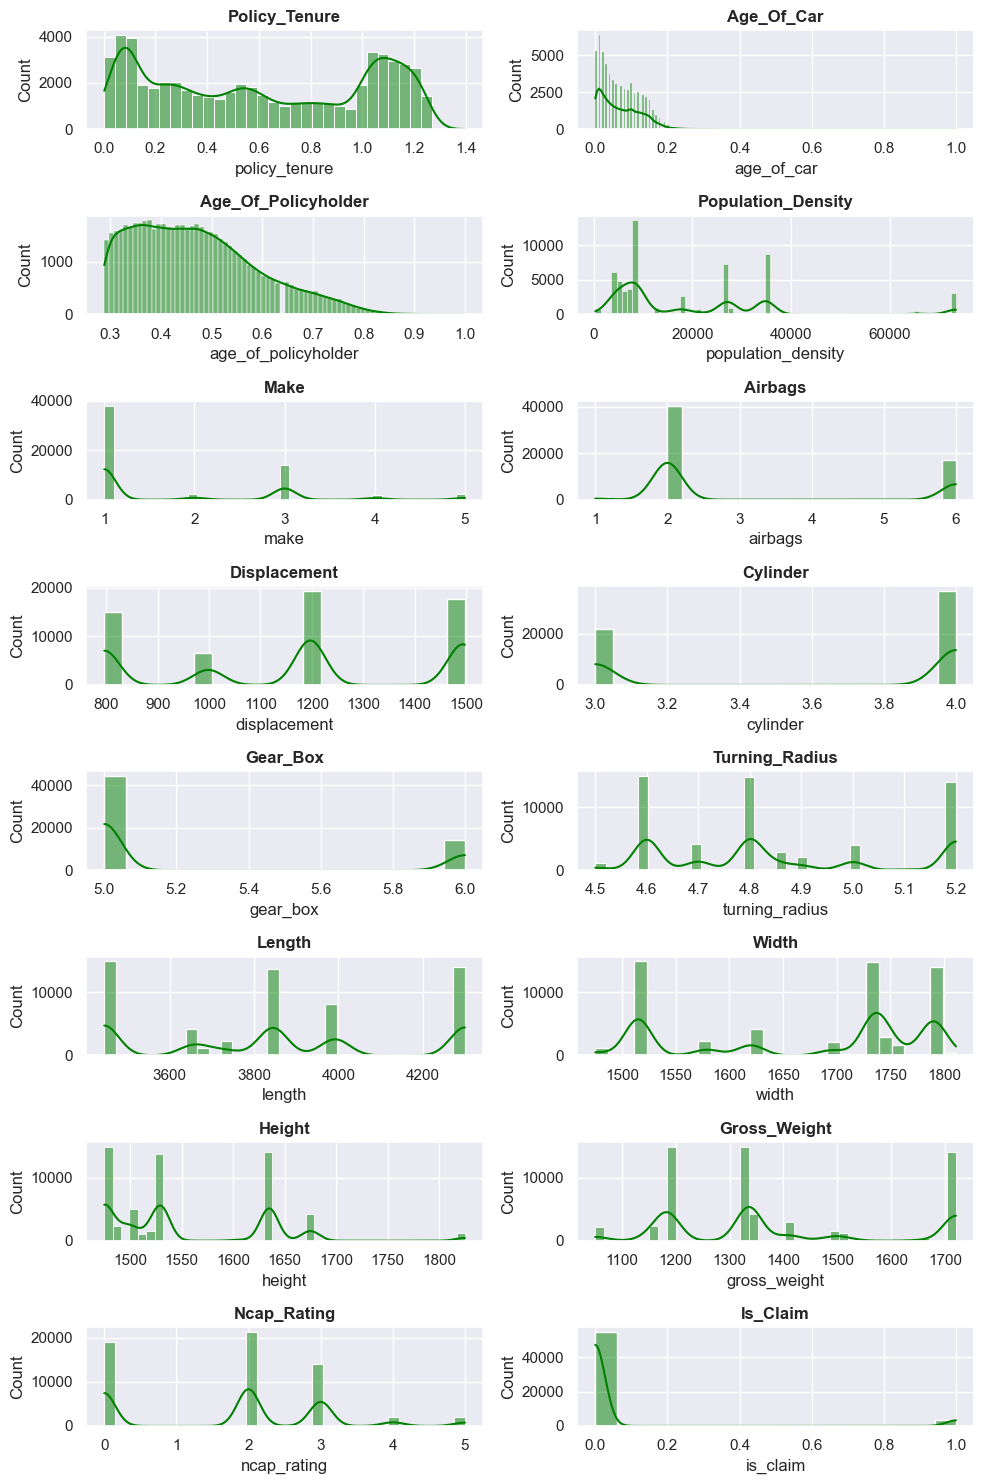

In [26]:
target = [i for i in numerical.columns]
plt.figure(figsize=(10,15))
for n, column in enumerate(target):
    plot=plt.subplot(8,2,n+1)
    sns.histplot(data[column],color='green', kde= True)
    plt.title(f'{column.title()}', weight='bold')
    plt.tight_layout()

# Analysis of Categorical Variables

In [27]:
cat_data = data.select_dtypes('object')

In [28]:
for col in data.select_dtypes('object'):
    if(data[col].nunique()>2):
        print(f"{col:40}---->{data[col].nunique():10} unique values")

policy_id                               ---->     58592 unique values
area_cluster                            ---->        22 unique values
segment                                 ---->         6 unique values
model                                   ---->        11 unique values
fuel_type                               ---->         3 unique values
max_torque                              ---->         9 unique values
max_power                               ---->         9 unique values
engine_type                             ---->        11 unique values
steering_type                           ---->         3 unique values


In [29]:
for col in data.select_dtypes('object'):
    if(data[col].nunique()<=2):
        print(f"{col:40}---->{data[col].nunique():10} unique values")

is_esc                                  ---->         2 unique values
is_adjustable_steering                  ---->         2 unique values
is_tpms                                 ---->         2 unique values
is_parking_sensors                      ---->         2 unique values
is_parking_camera                       ---->         2 unique values
rear_brakes_type                        ---->         2 unique values
transmission_type                       ---->         2 unique values
is_front_fog_lights                     ---->         2 unique values
is_rear_window_wiper                    ---->         2 unique values
is_rear_window_washer                   ---->         2 unique values
is_rear_window_defogger                 ---->         2 unique values
is_brake_assist                         ---->         2 unique values
is_power_door_locks                     ---->         2 unique values
is_central_locking                      ---->         2 unique values
is_power_steering   

In [30]:
cat_data.describe()

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,...,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592
unique,58592,22,6,11,3,9,9,11,2,2,...,2,2,2,2,2,2,2,2,2,2
top,ID00001,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,...,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,13654,18314,14948,20532,17796,17796,14948,40191,35526,...,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229


In [51]:
extracted_col = data["is_claim"]
# Add the extracted column to the second DataFrame
cat_data= pd.concat([cat_data, extracted_col.rename('is_claim')], axis=1)

In [52]:
print("Categorical Features in DataSet:", cat_data.shape[1])
print(cat_data.columns)

Categorical Features in DataSet: 28
Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'is_claim'],
      dtype='object')


/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/2504669174.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/2504669174.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/2504669174.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/2504669174.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/2504669174.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960/2504669174.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/9k/y_9vw51j5b3ftzk4z3jmk4yc0000gn/T/ipykernel_17960

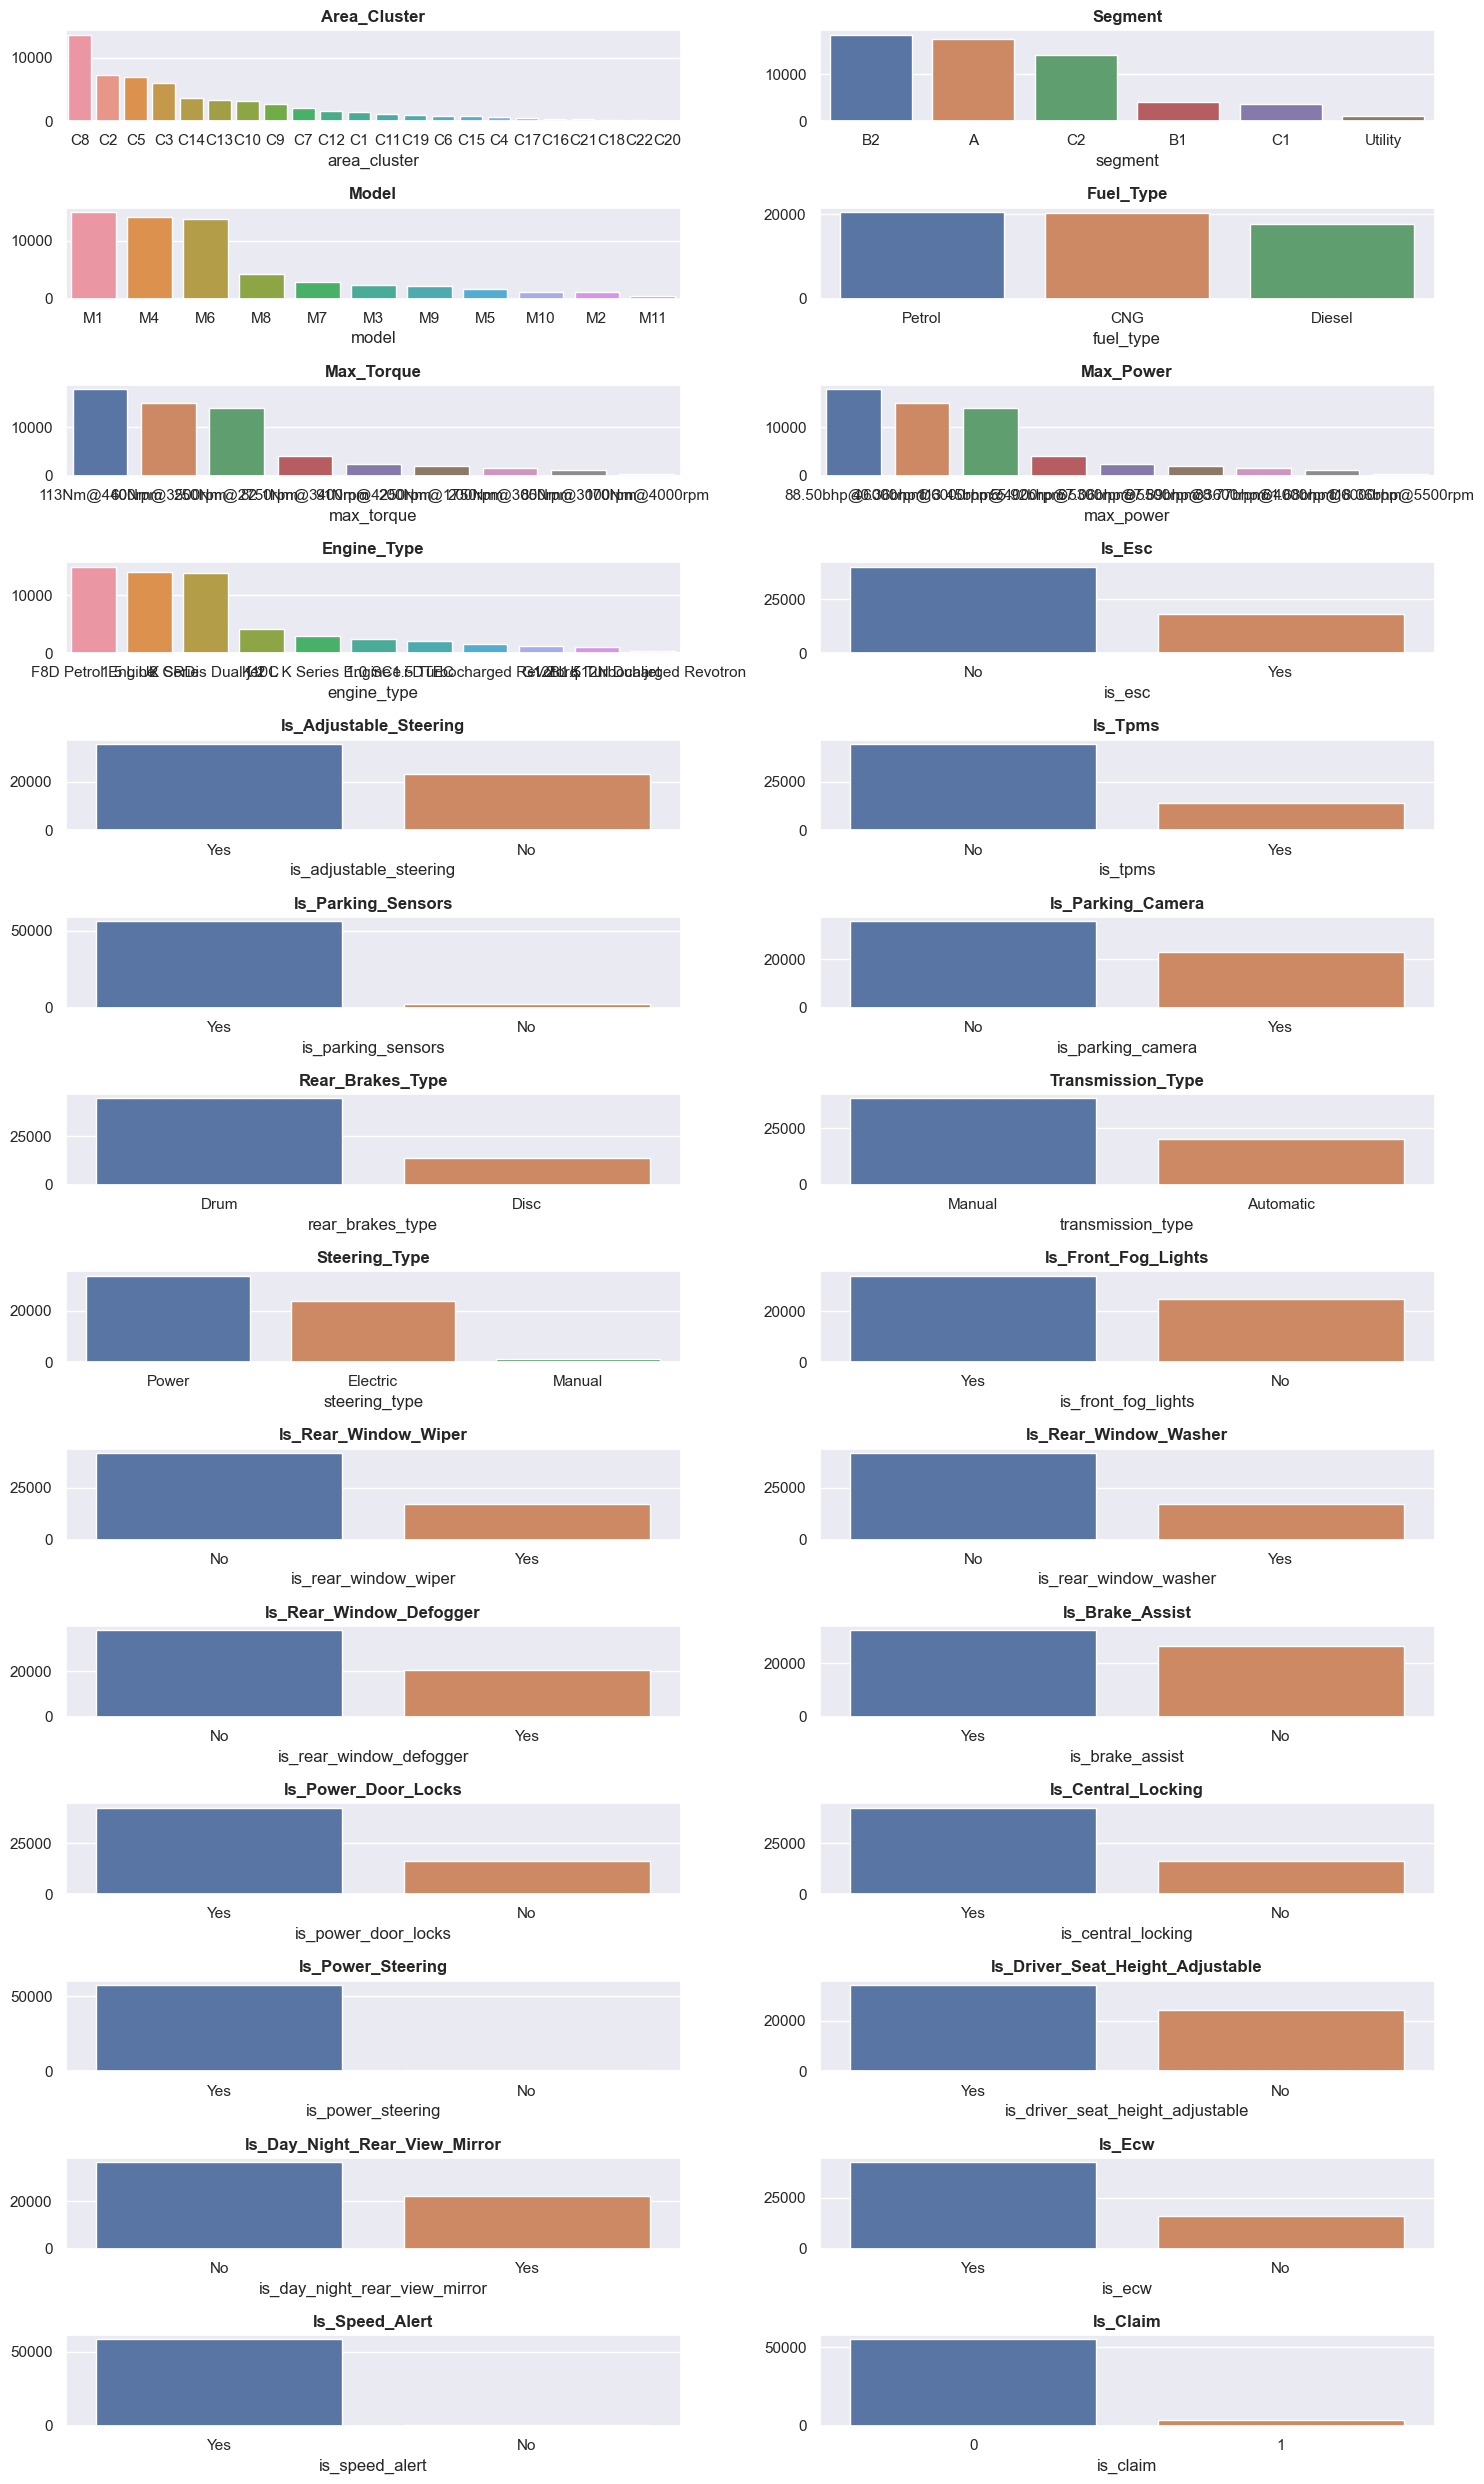

In [60]:
target = [i for i in cat_data.columns]
plt.figure(figsize=(15, 25))
for n, column in enumerate(target):
    plot = plt.subplot(14, 2, n+1)
    try:
        counts = data[column].value_counts()
        sns.barplot(x=counts.index, y=counts.values)
        plt.title(f'{column.title()}', weight='bold')
    except KeyError:
        print(f"Column '{column}' not found in the DataFrame.")
    plt.tight_layout()


<Axes: xlabel='ncap_rating', ylabel='count'>

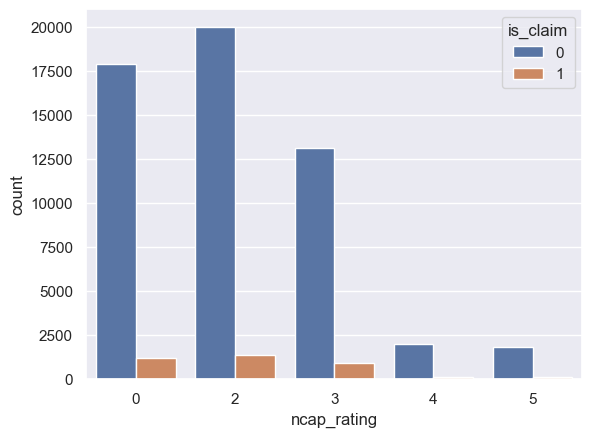

In [61]:
sns.countplot(x='ncap_rating', data= data, hue ='is_claim')

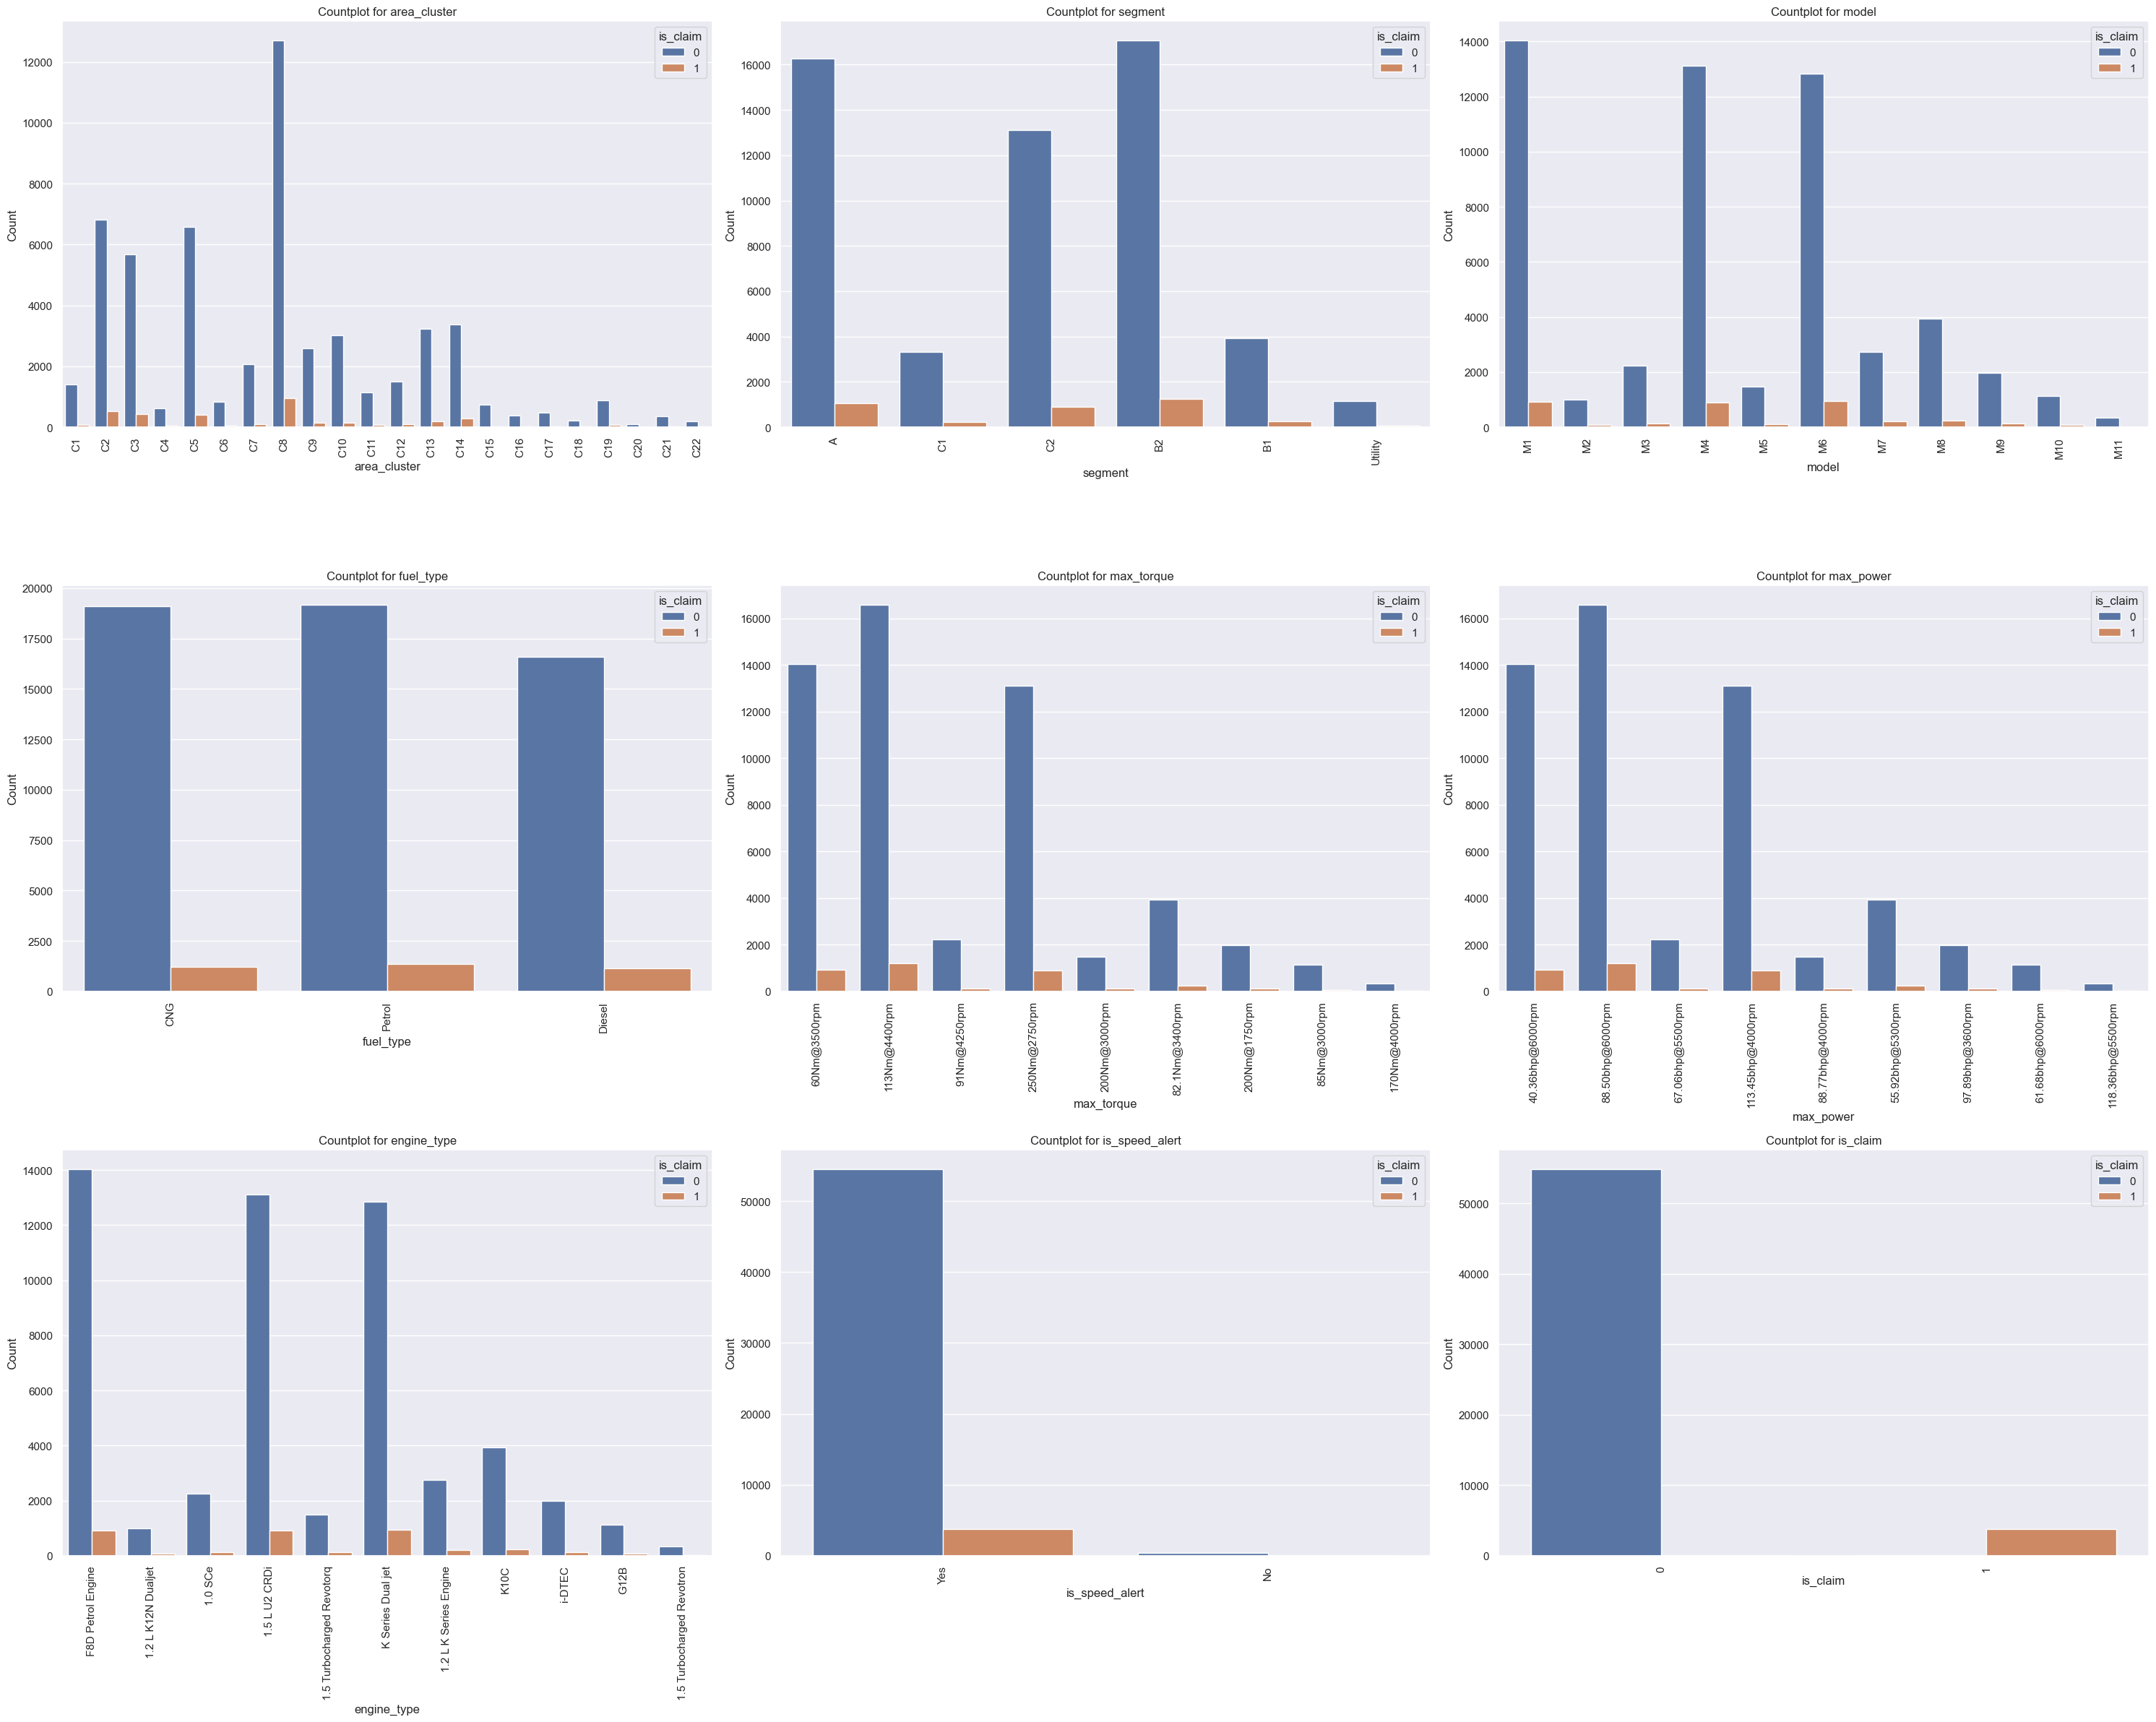

In [65]:
fig, axes = plt.subplots(3, 3, figsize=(30, 24))
axes = axes.flatten()

cat_var=['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque','max_power', 'engine_type', 'is_speed_alert','is_claim']

for i in range(len(cat_var)):
    column = cat_var[i]
    ax = axes[i]  # Select the current subplot

    # Plot the countplot
    sns.countplot(data=data, x=column, ax=ax, hue='is_claim')
    ax.set_title(f'Countplot for {column}')
    
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels if need
    
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

We can make a few observations from the categorical variables:

1) From the top left plot, we can infer that the greatest number of claims (about 1000) comes from area c8. 
2) From the top right plot, we can infer that owners of car models M1, M4 and M6 have the highest number of claims (about 1000 each). 
3) There are zero claims where the car does not possess a speed alert system.

<Axes: xlabel='area_cluster', ylabel='is_claim'>

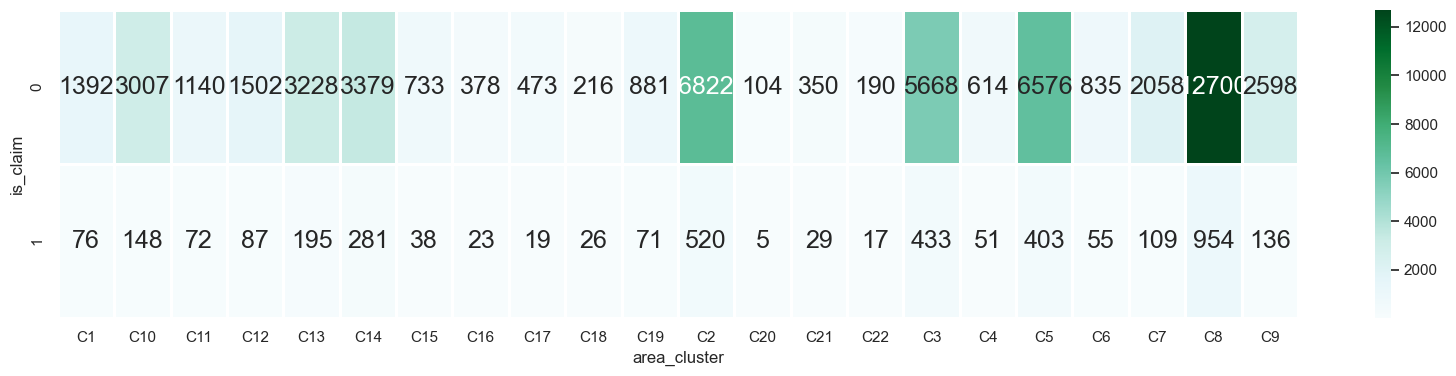

In [66]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'area_cluster']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='segment', ylabel='is_claim'>

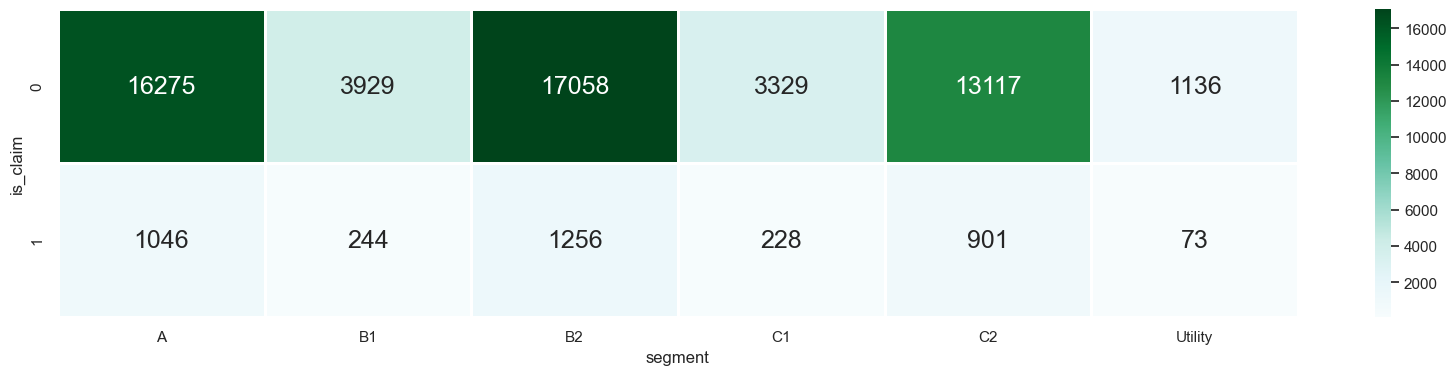

In [67]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'segment']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='model', ylabel='is_claim'>

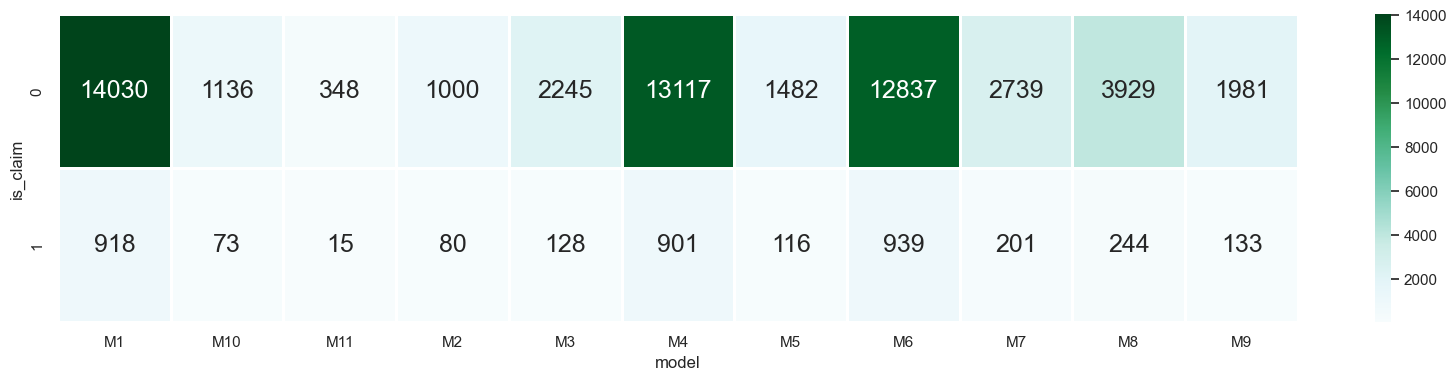

In [68]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'model']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='fuel_type', ylabel='is_claim'>

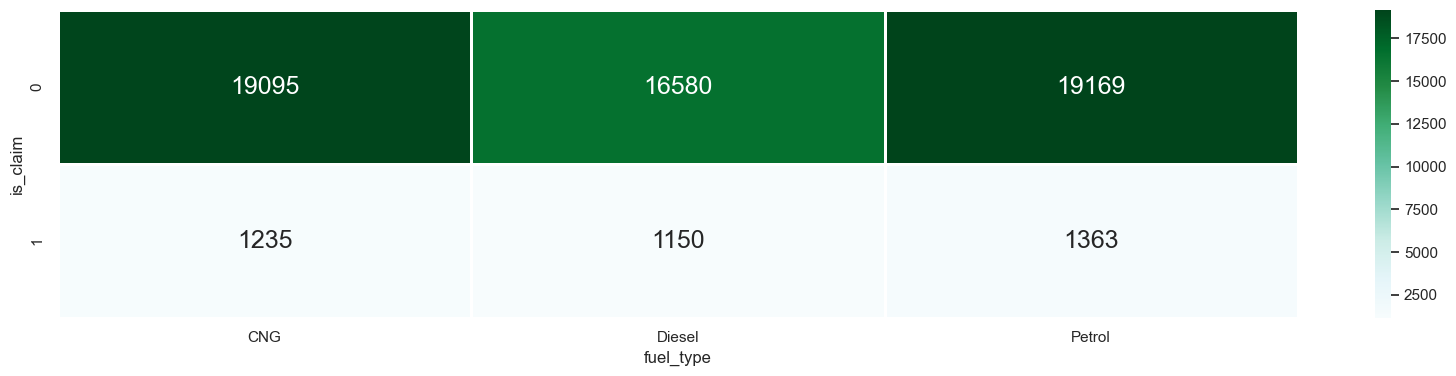

In [69]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'fuel_type']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='max_torque', ylabel='is_claim'>

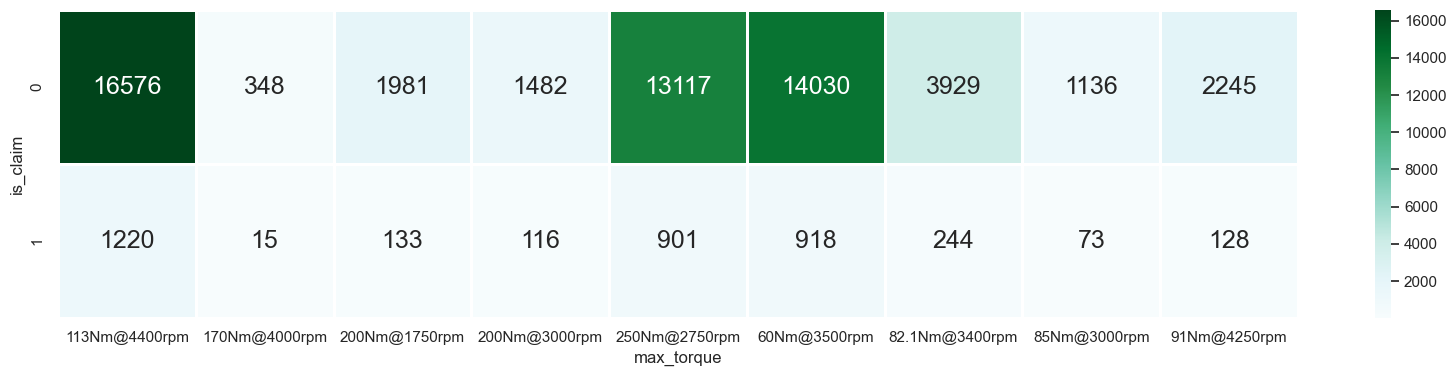

In [70]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'max_torque']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='max_power', ylabel='is_claim'>

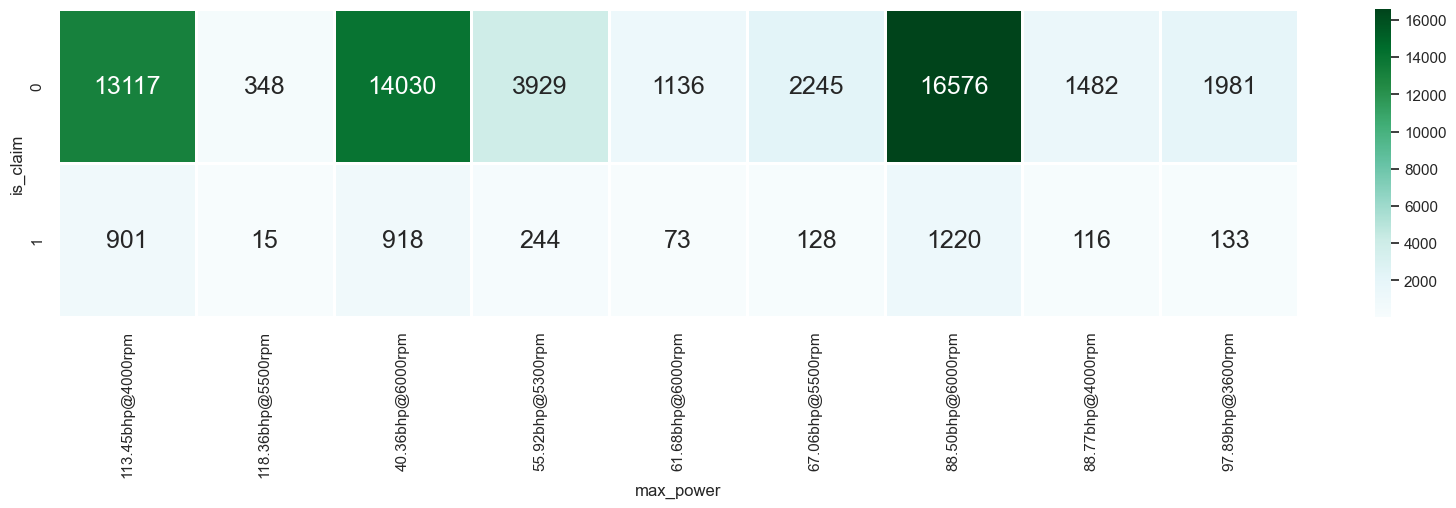

In [71]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'max_power']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='engine_type', ylabel='is_claim'>

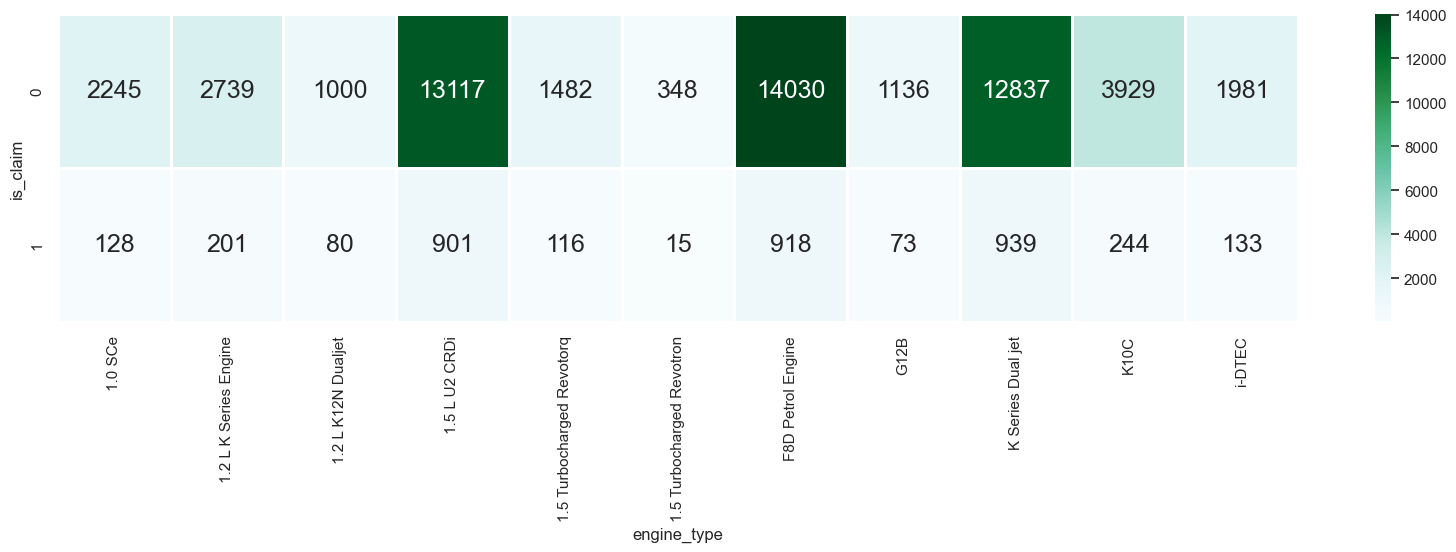

In [72]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'engine_type']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='is_speed_alert', ylabel='is_claim'>

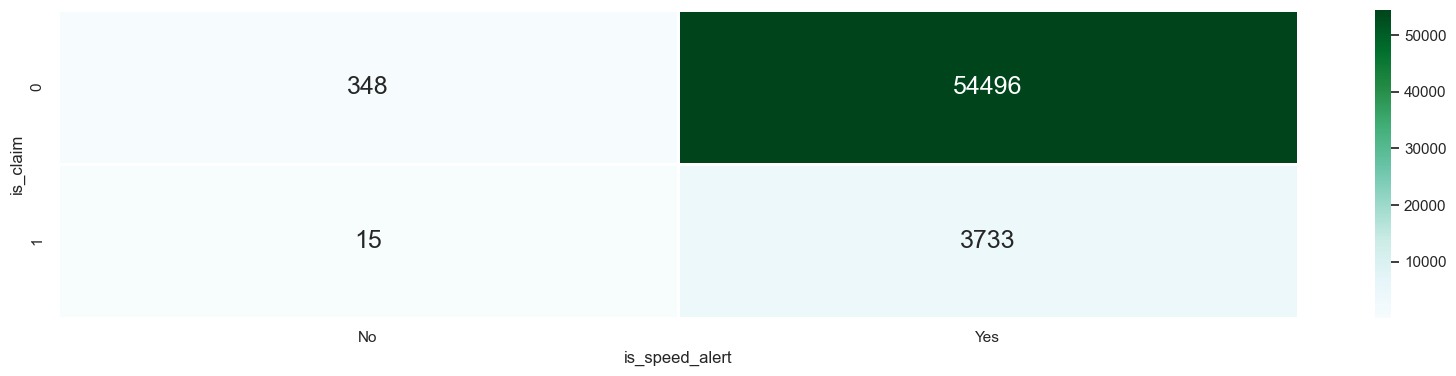

In [73]:
f = plt.figure(figsize = (20,4))
sb.heatmap(cat_data.groupby(['is_claim', 'is_speed_alert']).size().unstack(),
            linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Downsampling

Due to the large imbalance in the classes, we reduce the number of majority samples to balance the class distribution.

In [74]:
no_claim = data.drop(data[data['is_claim']==1].index)
claim = data.drop(data[data['is_claim']==0].index)

In [75]:
from sklearn.utils import resample
no_claim_downsample = resample(no_claim, replace = True, n_samples=len(claim), random_state =42)
print(no_claim_downsample.shape)

(3748, 44)


is_claim
0    3748
1    3748
Name: count, dtype: int64


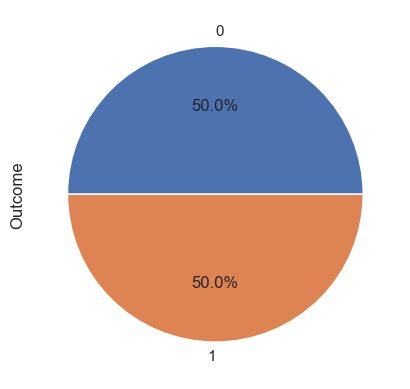

In [76]:
data = pd.concat([no_claim_downsample, claim])
print(data["is_claim"].value_counts())
data.groupby('is_claim').size().plot(kind = 'pie', y = 'is_claim', label = 'Outcome', autopct = '%1.1f%%')


numeric_data = data.select_dtypes(include = ['number'])